In [1]:
#this notebook is for testing the development of the geodata harvester package. 
#This package will be used for fetching spatial data from various ssources, but the MVP version of the package will fetch SGLA data.


In [2]:
import os
import json
import pandas as pd
import geopandas as gpd
from geodata_fetch import arc2meter
from geodata_fetch import settingshandler, harvest

import hvplot.pandas
from IPython.display import display, JSON

In [3]:
test = arc2meter.calc_arc2meter(3, 115)
print(test)

(-39.20460566863772, 92.61)


In [4]:
geom = gpd.read_file('input-data/dissolved-boundaries.geojson')
geom.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [5]:
reproject = geom.to_crs(3857)
gpd_lon = geom.centroid.x[0]
gpd_lat = geom.centroid.y[0]

bbox = list(geom.total_bounds)

print(gpd_lon)
print(gpd_lat)
print(bbox)

116.32813629361138
-29.263026061552612
[116.26012130269045, -29.307384715430175, 116.3875862387774, -29.220237788279107]


/tmp/ipykernel_35400/1660074240.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gpd_lon = geom.centroid.x[0]
/tmp/ipykernel_35400/1660074240.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gpd_lat = geom.centroid.y[0]


In [6]:
#generate settings file based on json input, since thats what will come from the API. save output settings as either yaml or json, and then use that settings file to get the data
#function that takes input strings and saves out a settings file
#function that reads that settings file and passes in the parameters needed to fetch the data
#process the request and download the tifs
# save out the tifs AND the settings json file to a specified directory.

In [7]:
#settings required based on demo yaml files

# Path to output directory (will be created if it doesn't exist):
outpath = 'output-data'

# Column names for latitude and longitude in input file:
colname_lat = gpd_lat
colname_lng = gpd_lon

# Bounding box: Left (min Long), Bottom (min Lat), Right (max Long), Top (max Lat)
target_bbox = bbox
# Resolution of data download in arcseconds (1 arcsec ~ 30m)
target_res = 3

date_start = "2022-10-01"
date_end = "2022-11-30"
# Number of time intervals to split the image collection into
#leaving as None causes an error. Will need to code a default value of 0 unless user selects otherwise.
time_intervals = 0

target_sources = {"SLGA":{
                "Organic_Carbon":["0-5cm"]}}

In [8]:
# Conversion to desired JSON format
"""
TODO: add default date inside appropriate function in harvest.py instead of here.
"""
json_data = {
    "infile":"test-name",
    "outpath": outpath,
    "target_centroid_lat": colname_lat,
    "target_centroid_lng": colname_lng,
    "target_bbox": target_bbox,
    "target_res": str(target_res),
    "date_start": date_start if date_start is not None else "2022-10-01", #a date of some kind must be provided or the harvester complains
    "date_end": date_end if date_end is not None else "2022-11-30",
    "time_intervals": time_intervals,
    "target_sources": target_sources
}


In [9]:
# Store the JSON data in a file
json_outpath = 'output-data'
json_outpath_fname = 'settings_test.json'

outfname = os.path.join(json_outpath,json_outpath_fname)

with open(outfname, "w", encoding='utf-8') as file:
    json.dump(json_data, file, ensure_ascii=False, indent=4)

In [10]:
# Path to file:
path_settings = 'output-data'
# Filename
fname_settings = 'settings_test.json'

infname = os.path.join(path_settings,fname_settings)

In [11]:
# print settings as json
#settingshandler.display_settings(infname)

In [12]:
# store settings as namespace (easier to interact with)
settings = settingshandler.main(infname)

Starting the data harvester -----
Found the following 1 sources: ['SLGA']


⌛ Downloading SLGA data...

Extracting data points for test-name  -----


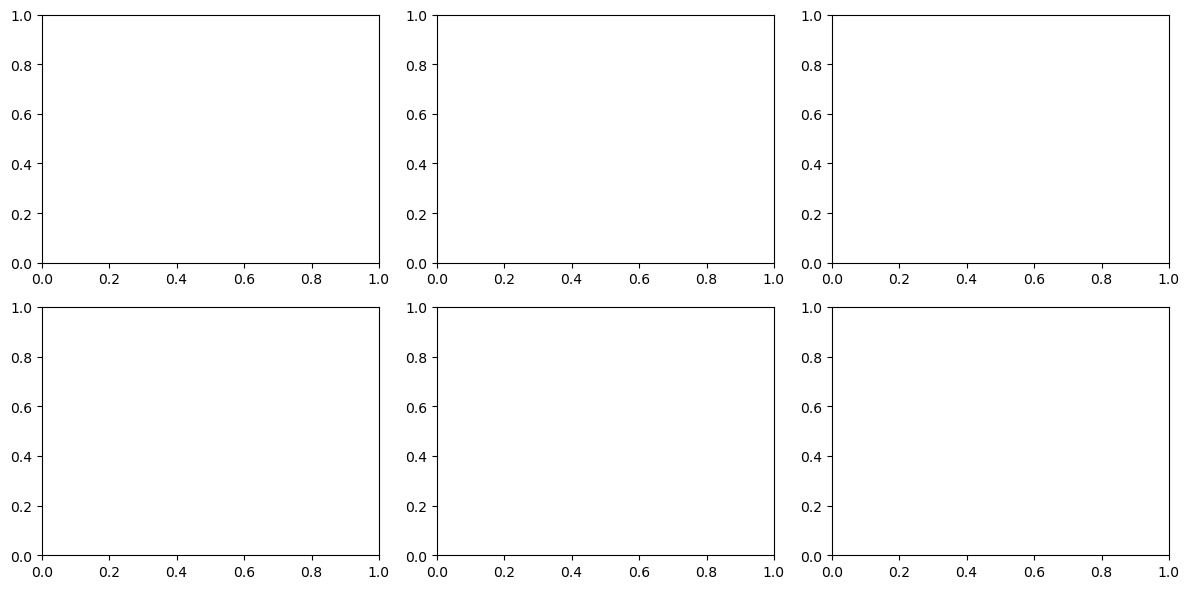


Harvest complete


In [13]:
df = harvest.run(infname, preview=False, return_df=False)